In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv('tele.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

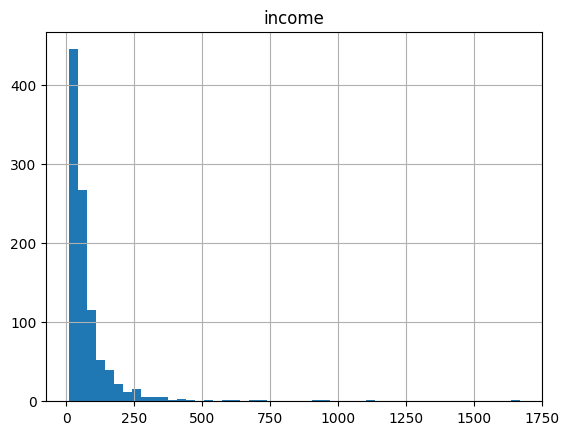

In [5]:
df.hist(column='income', bins=50)

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
x[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [9]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [10]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
k=4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [14]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [19]:
from sklearn import metrics
print("Train Set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(Y_test, neigh.predict(X_test)))

Train Set Accuracy:  0.5025
Test Set Accuracy:  0.34


In [17]:
ks = 10
mean_acc = np.zeros((ks-1))
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

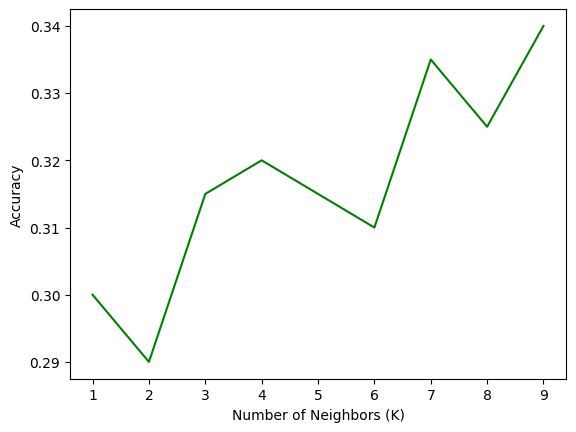

In [18]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [20]:
print("The Best accuracy was with", mean_acc.max(), "With k=", mean_acc.argmax()+1)

The Best accuracy was with 0.34 With k= 9
